 ## This project involves the use of fictitous employees data, splitted into two datasets
 #### sources and composition
- source 1 = 'basic_pay.csv': category of salary (salary_band), date of recording (cal_date), id (staff_id)
- source 2 = 'org_assignments.csv': organisational unit (org_unit), start of employment in that unit (start_date), end of employment in that unit (end_date), id (staff_id)64 

# Visualise the number of employees grouped by salary band on 1 January 2025.

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time

In [5]:
# import file
df  = pd.read_csv('basic_pay.csv', parse_dates = True, dayfirst = True)
print('General info', df.info())
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192574 entries, 0 to 192573
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   salary_band  192574 non-null  object
 1   cal_date     192574 non-null  int64 
 2   staff_id     192574 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB
General info None
Number of rows:  192574
Number of columns:  3


In [6]:
# Data snippet
df.head()

,salary_band,cal_date,staff_id
0,I,20240102,434
1,I,20240103,434
2,I,20240104,434
3,I,20240105,434
4,I,20240106,434


In [7]:
# datetime conversion of columns
df['cal_date'] = pd.to_datetime(df['cal_date'] , format= "%Y%m%d")

In [8]:
df['cal_date'].dtype # conversion done 

dtype('<M8[ns]')

In [9]:
# group staff_id data by salary band and count the unique occurrecies
df_grouped = df.groupby('salary_band')['staff_id'].nunique()

In [10]:
# ordered 
df_grouped = df_grouped.sort_values(ascending = False)
df_grouped

salary_band
F/G    105
E/F     92
H       82
D       59
I       52
C       50
J       35
E       22
B       11
K       10
L        5
A        1
G        1
Name: staff_id, dtype: int64

In [11]:
# give a name to the counts column  
df_grouped = df_grouped.rename({'staff_id': 'Numero di dipendenti'})

C:\Users\giamm\AppData\Local\Temp\ipykernel_30416\3087341368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, palette="viridis") # se una colonna categoriale e una continua allora si ha una series


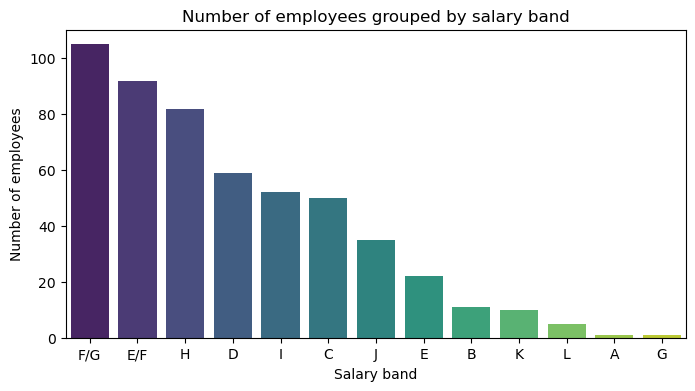

In [12]:
# plot a graph of nmbernof employees grouped by salary band
plt.figure(figsize=(8,4))
sns.barplot(data=df_grouped, palette="viridis") # se una colonna categoriale e una continua allora si ha una series
plt.title('Number of employees grouped by salary band')
plt.xlabel('Salary band')
plt.ylabel('Number of employees')
plt.show()

# What is the share of managers (salary bands I to L) on 1 January 2025?

In [14]:
df  = pd.read_csv('basic_pay.csv', parse_dates = True, dayfirst = True)
print('General info', df.info())
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192574 entries, 0 to 192573
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   salary_band  192574 non-null  object
 1   cal_date     192574 non-null  int64 
 2   staff_id     192574 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB
General info None
Number of rows:  192574
Number of columns:  3


In [15]:
# data snippet
df.head()

,salary_band,cal_date,staff_id
0,I,20240102,434
1,I,20240103,434
2,I,20240104,434
3,I,20240105,434
4,I,20240106,434


In [16]:
# column conversion in datetime type of data
df['cal_date'] = pd.to_datetime(df['cal_date'] , format= "%Y%m%d")

In [17]:
# filter data from 01-01-2025
df= df[df['cal_date'] == '2025-01-01']

In [18]:
df.head()

,salary_band,cal_date,staff_id
365,I,2025-01-01,434
789,E/F,2025-01-01,140
1213,D,2025-01-01,89
1637,I,2025-01-01,414
2111,I,2025-01-01,443


In [19]:
# count unique values for each category
conto_manager = df['salary_band'].value_counts()
conto_manager =pd.DataFrame(conto_manager)
conto_manager # NB salary band data is the index

,count
salary_band,
F/G,91
E/F,77
H,76
D,49
I,48
C,42
J,32
E,18
B,10


In [20]:
# pivoting table
# making it wide to build a pie chart
conto_manager = conto_manager.T
conto_manager

salary_band,F/G,E/F,H,D,I,C,J,E,B,K,L,G,A
count,91,77,76,49,48,42,32,18,10,10,4,1,1


In [21]:
# pie chart 
manager_high = conto_manager[['I', 'J', 'K', 'L']].sum(axis=1).values[0] # sum of the values of column I'm interested to plot against all the other
other_managers = conto_manager.drop(columns=['I', 'J', 'K', 'L']).sum(axis=1).values[0] # sum of values of all the other columns

In [22]:
# Pie chart data
sizes = [manager_high, other_managers]
labels = ['High managers', 'Other managers']

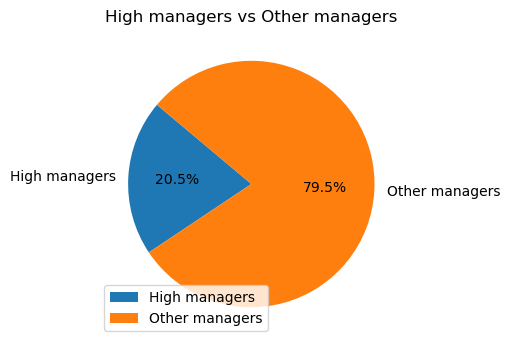

In [23]:
# Pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels,  autopct='%1.1f%%', startangle=140)
plt.title('High managers vs Other managers')
plt.legend(loc= 'lower left')
plt.show()

# Does the share differ substantially by organisational unit?

In [25]:
# Must merge datasets by the column staff_id 
# import data
df_salary  = pd.read_csv('basic_pay.csv', parse_dates = True, dayfirst = True)
df_org_unit = df  = pd.read_csv('org_assignments.csv', parse_dates = True, dayfirst = True)

In [26]:
# check if the staff_id columns map one on the other
sorted(df_salary['staff_id'].unique()) == sorted(df_org_unit['staff_id'].unique())

True

In [27]:
# merging the datasets by staff_id using key combinations found in the left table
df_merged = pd.merge(df_salary, df_org_unit, on='staff_id', how='left')

In [28]:
# check for na's from the merging
df_merged.isna().sum()

salary_band    0
cal_date       0
staff_id       0
org_unit       0
start_date     0
end_date       0
dtype: int64

In [29]:
# create a vector of values I'm interested
manager_bands = ['I', 'J', 'K', 'L']

In [30]:
# select all data from January-1-1 without conversion into datetime data
df_2025 = df_merged[df_merged['cal_date'] == 20250101]

In [31]:
# data snippet
df_2025.head()

,salary_band,cal_date,staff_id,org_unit,start_date,end_date
1825,I,20250101,434,DGIS,20240627,20240831
1826,I,20250101,434,DGIS,20240901,20241016
1827,I,20250101,434,DGIS,20200101,20240626
1828,I,20250101,434,DGIS,20241017,20250626
1829,I,20250101,434,DGIS,20250627,20291231


In [32]:
# % managers in org units
share_by_unit = df_2025.groupby('org_unit').apply(   # group data by org_units
    lambda g: (g[g['salary_band'].isin(manager_bands)].shape[0]) / g.shape[0] * 100) # subsets values of org_units relative to values of manager_bands, counts the observations  
                                                                                    # divides the by the total numbers of observations in the filtered merged data

C:\Users\giamm\AppData\Local\Temp\ipykernel_30416\367818228.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  share_by_unit = df_2025.groupby('org_unit').apply(   # group data by org_units


In [33]:
# check the result 
share_by_unit

org_unit
DGCS      6.733167
DGIS     14.285714
DGMIP    18.918919
DGS      18.411552
dtype: float64

In [34]:
# reset index to make org_unita column and adding a column to identify the values
share_by_unit = share_by_unit.reset_index(name='manager_share')
print(share_by_unit)

  org_unit  manager_share
0     DGCS       6.733167
1     DGIS      14.285714
2    DGMIP      18.918919
3      DGS      18.411552


In [35]:
# sorting data 
share_by_unit = share_by_unit.sort_values('manager_share', ascending=False)

C:\Users\giamm\AppData\Local\Temp\ipykernel_30416\647683428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=share_by_unit, x='manager_share', y='org_unit', palette='Blues_d')


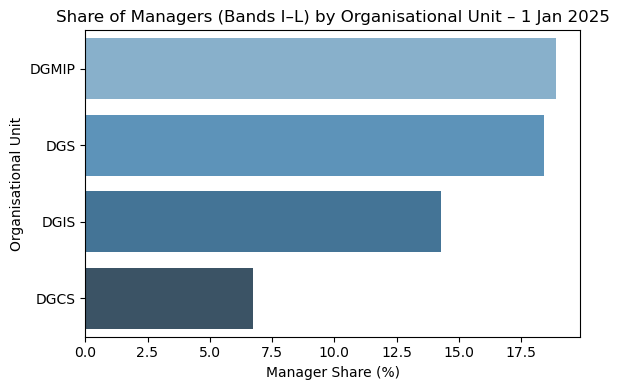

In [36]:
# and visualizing it with seaborn
plt.figure(figsize=(6, 4))
sns.barplot(data=share_by_unit, x='manager_share', y='org_unit', palette='Blues_d')

plt.xlabel('Manager Share (%)')
plt.ylabel('Organisational Unit')
plt.title('Share of Managers (Bands I–L) by Organisational Unit – 1 Jan 2025')
plt.tight_layout()
plt.show()

# How many employees in organisational unit "DGIS" were promoted to an "F/G" salary band in 2024? 
### The employees must have been previously employed at an "E/F" salary band in any organisational unit across the dataset.

In [38]:
# check for the type of data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533059 entries, 0 to 533058
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   salary_band  533059 non-null  object
 1   cal_date     533059 non-null  int64 
 2   staff_id     533059 non-null  int64 
 3   org_unit     533059 non-null  object
 4   start_date   533059 non-null  int64 
 5   end_date     533059 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 24.4+ MB


In [39]:
# convert data to datetime to simplify the reasoning and the manipulations
df_merged['cal_date'] = pd.to_datetime(df_merged['cal_date'] , format= "%Y%m%d")
df_merged['start_date'] = pd.to_datetime(df_merged['start_date'] , format= "%Y%m%d")
df_merged['end_date'] = pd.to_datetime(df_merged['end_date'] , format= "%Y%m%d")
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533059 entries, 0 to 533058
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   salary_band  533059 non-null  object        
 1   cal_date     533059 non-null  datetime64[ns]
 2   staff_id     533059 non-null  int64         
 3   org_unit     533059 non-null  object        
 4   start_date   533059 non-null  datetime64[ns]
 5   end_date     533059 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(2)
memory usage: 24.4+ MB


In [40]:
# filter subjects in E/F salary band 
Df_selez = df_merged[(df_merged['salary_band']  == 'E/F') | (df_merged['salary_band']  == 'F/G')]

In [41]:
# filter only data in 2024
Df_selez = Df_selez[((Df_selez['start_date'] >= '2024-01-01') & (Df_selez['end_date'] <= '2024-12-31'))]

In [42]:
# snippet of what has been done until now
Df_selez.head()

,salary_band,cal_date,staff_id,org_unit,start_date,end_date
2120,E/F,2024-01-02,140,DGS,2024-01-01,2024-07-21
2121,E/F,2024-01-02,140,DGS,2024-07-22,2024-08-30
2124,E/F,2024-01-02,140,DGS,2024-08-31,2024-10-31
2125,E/F,2024-01-02,140,DGS,2024-11-01,2024-12-31
2126,E/F,2024-01-03,140,DGS,2024-01-01,2024-07-21


In [43]:
# get employees previously employed in sectors with an E/F salary band
previous = df_merged[
    (df_merged['salary_band'] == 'E/F')]

In [44]:
# snippet of the data
previous.head()

,salary_band,cal_date,staff_id,org_unit,start_date,end_date
2120,E/F,2024-01-02,140,DGS,2024-01-01,2024-07-21
2121,E/F,2024-01-02,140,DGS,2024-07-22,2024-08-30
2122,E/F,2024-01-02,140,DGS,2025-01-01,2025-12-31
2123,E/F,2024-01-02,140,DGS,2026-01-01,2029-12-31
2124,E/F,2024-01-02,140,DGS,2024-08-31,2024-10-31


In [45]:
# Merging the two datasets based on 'staff_id' to get the employees who match both conditions by keeping only the shared columns
promoted = pd.merge(Df_selez, previous[['staff_id']], on='staff_id', how='inner')

In [46]:
# count promoted employees
N_promoted = promoted['staff_id'].nunique()

In [47]:
print(f"Number of employees in DGIS promoted to 'F/G' in 2024 who were previously in 'E/F': {N_promoted}")

Number of employees in DGIS promoted to 'F/G' in 2024 who were previously in 'E/F': 46


# How many employees moved to a different organisational unit during 2024?

In [49]:
# import and look at the data
df  = pd.read_csv('org_assignments.csv', parse_dates = True, dayfirst = True)
print('Info generali', df.info())
print('Rows: ', df.shape[0],'  Columns: ', df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   org_unit    1361 non-null   object
 1   start_date  1361 non-null   int64 
 2   end_date    1361 non-null   int64 
 3   staff_id    1361 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 42.7+ KB
Info generali None
Rows:  1361   Columns:  4


In [50]:
# number of unique values in each column 
# if somebody changed contract staff_id and number of rows would coincide
df.nunique()

org_unit        4
start_date    357
end_date      259
staff_id      493
dtype: int64

In [51]:
# data snippet
df.head()

,org_unit,start_date,end_date,staff_id
0,DGIS,20231031,20291231,485
1,DGCS,20240326,20240531,105
2,DGCS,20240601,20240630,105
3,DGCS,20240701,20240725,105
4,DGCS,20241130,20241130,105


In [52]:
# convert column values to datetime type of data 
# mind that the format imply the same lenght of the values. It means that years as y% would raise an error, here i use %Y
df['start_date'] = pd.to_datetime(df['start_date'] , format= "%Y%m%d")
df['end_date'] = pd.to_datetime(df['end_date'] , format= "%Y%m%d")

In [53]:
# filter start date from 2023-01-01 included to end date 2025-12-31 included
df = df[((df['start_date'] >= '2024-01-01') & (df['end_date'] <= '2025-12-31'))]

In [54]:
# how much data is left?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 1 to 1359
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   org_unit    633 non-null    object        
 1   start_date  633 non-null    datetime64[ns]
 2   end_date    633 non-null    datetime64[ns]
 3   staff_id    633 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 24.7+ KB


In [55]:
# grouping data by staff_id and count unique values in start_date
# logic behind it: a number of start dates > 1 for a staff_id means that that employee has started over into an other unit that year
cambi = df.groupby('staff_id')['start_date'].nunique()

In [56]:
cambi # check the result

staff_id
2      1
5      5
6      4
9      7
11     1
      ..
477    1
479    1
482    1
484    1
486    1
Name: start_date, Length: 240, dtype: int64

In [57]:
# make it a df
cambi = pd.DataFrame(cambi)

In [58]:
# rename column to make the menaning of the values clearly meaningful
cambi = cambi.rename(columns = {'start_date': 'Num_cambi'})

In [59]:
#check the result 
cambi

,Num_cambi
staff_id,
2,1
5,5
6,4
9,7
11,1
...,...
477,1
479,1
482,1


In [60]:
# how many subjects changed contract in 2024?
print('Number of employees who underwent a contract upgrade: ', cambi[cambi['Num_cambi']>1].count())

Number of employees who underwent a contract upgrade:  Num_cambi    153
dtype: int64
